## GAN 논문 소개
Generative Adversarial Networks (GANs)은 최근 딥러닝 방법론 중 가장 각광받고 있는 생성 네트웍이다. Ian Goodfellow가 NIPS 2014 학술대회를 통해 발표한 이 기법은 기존의 생성 네트워크와는 달리 고품질 출력을 얻을 수 있는 것이 특징이다. 지난 4-5년 동안 GAN에 대한 수많은 연구가 이루어졌으며, 최근의 GAN 기법들은 그래픽스 렌더링을 한 것과 같은 매우 우수한 품질을 가지는 결과물도 얻어내고 있다. 

* GAN original paper
* CGAN
* LAPGAN
* DCIGN
* DCGAN
* VAEGAN
* InfoGAN
* Pix2Pix
* CycleGAN
* WGAN
* Pix2PixHD
* HDGAN
* BigGAN

## GAN의 기본 아이디어

GAN의 기본 아이디어는 원 논문에서 다음과 같이 소개하고 있다.
> The generative model can be thought of as analogous to a team of counterfeiters, trying to produce face currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the ounterfeits are indistiguishable from the genuine articles. - Goodfellow et al. NIPS 2014.

GAN은 generator(생성자, 이하 G)와 discriminator(판별자, 이하 D)라는 두 네트웍이 경쟁적 관계 속에 학습한다. 

생성자 G와 판별자 D는 게임이론(game theory)에 기반한 2인 플레이 최적화 게임 방식으로 학습하는데, 각자 게임에서 좋은 평가를 받는 방식은 서로 다르다. 생성자 G는 판별자 D의 실수를 최대한 많이 유도하는 데이터를 만들어내면 좋은 평가를 받는 반면, 판별자 D는 생성자 G가 만들어낸 데이터(generated data)와 진실 데이터(ground-truth data)를 잘 구분하면 좋은 평가를 받는다. 

이런 종류의 문제를 **minmax two-play game**이라 한다. 

## GAN 네트웍 구조

![GAN](https://cdn-images-1.medium.com/max/800/1*XKanAdkjQbg1eDDMF2-4ow.png)

[이미지 출처: Branko Blagojevic's Medium Post](https://medium.com/ml-everything/generating-letters-using-generative-adversarial-networks-gans-161b0be3c229)


### Generator (생성자, G)
생성자 G의 목표는 데이터 $x$를 만들어내는 확률 모델 $p_g$를 학습해 내는 것이다. 

입력으로 다음과 같이 어떤 확률분포를 따르는 노이즈 $z$가 있다고 하면,
$$z \sim p_z(z)$$
생성자 G는 다음과 같이 노이즈 $z$를 입력으로 받아 생성 데이터를 만들어 내는 함수로 볼 수 있다.
$$ G(z; \theta_g) $$

생성자 G에 대한 함수는 딥네트웍으로 모델링 가능하며, 학습은 파라메터 $\theta_g$를 생성자의 목표에 맞게 최적화 시키는 과정으로 볼 수 있다.

### Discriminator (판별자, D)
판별자 D는 입력으로 데이터 $x$를 받고 이에 대한 판별을 한다. 
$$ D(x; \theta_d)$$

우리가 판별자에게 기대하는 바는 

* 입력 데이터 $x$가 진실 데이터로부터 나왔으면 판별자 D가 1을 리턴해 주고,
* 입력 데이터 $x$가 생성자 G가 만들어낸 것이라면 판별자 D는 0을 리턴해 주는 것이다.

판별자 D에 대한 함수는 딥네트웍으로 모델링 가능하며, 학습은 파라메터 $\theta_d$를 판별자의 목표에 맞게 최적화 시키는 과정으로 볼 수 있다.





### GAN 목적함수
I. Goodfellow는 GAN 논문에서 이와 같은 minmax two-play game을 두개의 적대적 네트웍으로 모델링하고 턴제 게임 방식의 훈련법을 제시하였다.

다음은 GAN 학습단계의 목적함수이다.

$$
\begin{align}
    \min_{G}\max_{D} V(G, D) = \mathbb{E}_{\mathbf{x} \sim p_{\textit{data}}(\mathbf{x})}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))]
\end{align}
$$


판별자 D가 똑똑하게 훈련된다면 
* 진실 데이터를 봤을 때의 기대값, 즉 $\mathbb{E}_{\mathbf{x} \sim p_{\textit{data}}(\mathbf{x})}[\log D(\mathbf{x})] = 0$이 되어야 한다.
* 생성자 G가 만들어낸 데이터를 봤을 때의 기대값, 즉 $\mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))] = 0$이 되어야 한다.

따라서, 판별자 D 입장에서 게임의 목표는 목적함수를 최대화 하는 것이다.


생성자 G가 똑똑하게 훈련되었다면
* 판별자 D를 속일만큼 양질의 데이터가 만들어졌기 때문에 $D(G(\mathbf{z})) = 1$이 되어야 하므로, 기대값 $\mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))] = -\infty$이 된다.

따라서, 생성자 G 입장에서 게임의 목표는 목적함수를 최소화 하는 것이다.


### GAN v.s. VAE

학습 단계에서 VAE와 GAN은 다음 차이점이 있다.

* VAE에서 latent variable은 backprop에 참여하는 반면, visible unit (예: 영상)은 backprop에 참여하지 않는다.
* GAN에서 latent variable은 backprop에 참여하지 않는 반면, visible unit (예: 영상)은 backprop에 참여한다.

In [0]:
!pip install -q --upgrade tf-nightly-gpu-2.0-preview
!pip install -q tfp-nightly

In [0]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf                       # 텐서플로우 임포트
import tensorflow_probability as tfp

from tensorflow.keras import models, layers   # 케라스 관련 모듈 임포트

print("Python:", sys.version)
print("Numpy:", np.__version__)

print("Tensorflow: ", tf.__version__)        # 텐서플로우 버전을 확인하도록 한다.
print("Keras: ", tf.keras.__version__)  # 케라스 버전을 확인한다.

print("Tensorflow Probability: ", tfp.__version__)       # TFP 버젼을 확인한다.

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Tensorflow:  2.0.0-dev20190620
Keras:  2.2.4-tf
Tensorflow Probability:  0.8.0-dev20190620


In [0]:
# MNIST 데이터 로딩
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [-1, 1] (* tanh을 거친 값과 비교해야 하기 때문...)
train_images = (train_images - 127.5) / 127.5 
test_images = (test_images - 127.5) / 127.5 

# tensorflow probablity layer가 float32를 입력을 받기 때문에 float64를 float32로 캐스팅
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# 데이터가 [-1, 1] 사이로 정규화 되었는지 확인
print(np.amin(train_images), np.amax(train_images))


print(train_images.shape)
print(test_images.shape)
print(train_images[0].shape)
print(train_images[0][0][0].dtype)
print(train_labels[0].dtype)

-1.0 1.0
(60000, 28, 28)
(10000, 28, 28)
(28, 28)
float32
uint8


### MNIST 데이터의 label인 10차원 벡터를 condition으로 추가한다.

In [0]:
num_classes = 10

train_label_onehots = tf.keras.utils.to_categorical(train_labels, num_classes)
test_label_onehots  = tf.keras.utils.to_categorical(test_labels, num_classes)

# 데이터 변환 확인
print(train_label_onehots.shape)
print(test_label_onehots.shape)

print(train_label_onehots[0])
print(train_labels[0])
print(test_label_onehots[0])
print(test_labels[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [0]:
# 트레이닝 데이터 배치 사이즈 결정 및 셔플
BUFFER_SIZE = 60000
BATCH_SIZE = 100

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_label_onehots)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

![GAN](https://cdn-images-1.medium.com/max/800/1*XKanAdkjQbg1eDDMF2-4ow.png)

[이미지 출처: Branko Blagojevic's Medium Post](https://medium.com/ml-everything/generating-letters-using-generative-adversarial-networks-gans-161b0be3c229)

In [0]:
# Generator 모델 작성
gen_input = tf.keras.Input(shape=(100,))
gen_con = tf.keras.Input(shape=(10, ))

gen_dense1 = layers.Dense(256)
gen_LeakyReLU = layers.LeakyReLU()
gen_dense2 = layers.Dense(28*28, activation='tanh')
gen_reshape = layers.Reshape(target_shape=(28,28))


x = tf.keras.layers.concatenate([gen_input, gen_con])
x = gen_dense1(x)
x = gen_LeakyReLU(x)
x = gen_dense2(x)
gen_output = gen_reshape(x)

G = tf.keras.Model([gen_input, gen_con], gen_output)

# G = tf.keras.models.Sequential([  ## GAN에는 Layer가 많으면 학습이 많이 더뎌지므로 적게 구성..
#     layers.InputLayer(input_shape=(100,)),
#     layers.Dense(256),
#     layers.LeakyReLU(),
#     layers.Dense(28*28, activation='tanh'),  ##여러 가지 실험을 통해 tanh 함수가 가장 효과가 좋다고 밝혀짐
#     layers.Reshape(target_shape=(28,28)),
# ])

## Generator와 Discriminator의 구조
Generator의 구조는 아래와 같다.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 110)          0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          28416       concatenate[0][0]            

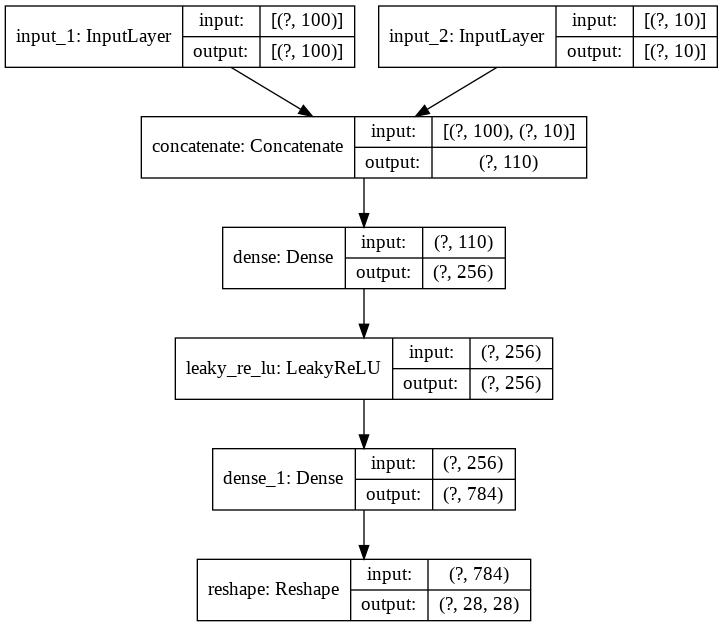

In [0]:
G.summary()
tf.keras.utils.plot_model(G, 'generator.png', show_shapes=True)

위의 구조에서 알 수 있듯이, Generator의 입력으로는 (?, 100) 형태의 noise와 (?, 10) 형태의 condition이 합쳐진 (?, 110)의 텐서 구조가 들어오는 것을 알 수 있다. ?는 데이터가 몇 개가 들어올 지 모른다는 의미이다.

In [0]:
# Discriminator 모델 작성
dsc_input = tf.keras.Input(shape=(28,28))
dsc_con = tf.keras.Input(shape=(10, ))

dsc_Flatten = layers.Flatten()
dsc_den1 = layers.Dense(256)
dsc_LeakyReLU = layers.LeakyReLU()
dsc_Dropout = layers.Dropout(0.3)
dsc_den2 = layers.Dense(1)

flat_img = dsc_Flatten(dsc_input)
x = tf.keras.layers.concatenate([flat_img, dsc_con])
x = dsc_den1(x)
x = dsc_LeakyReLU(x)
x = dsc_Dropout(x)
dsc_output = dsc_den2(x)

D = tf.keras.Model([dsc_input, dsc_con], dsc_output)

# D = tf.keras.models.Sequential([
#     layers.InputLayer(input_shape=(28,28)),
#     layers.Flatten(),
#     layers.Dense(256),
#     layers.LeakyReLU(),
#     layers.Dropout(0.3),  ## dropout이나 batch normalization을 많이 사용
#     layers.Dense(1), ## true or false (1차원)
# ])

Discriminator의 구조는 아래와 같다.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 794)          0           flatten[0][0]                    
                                                                 input_4[0][0]              

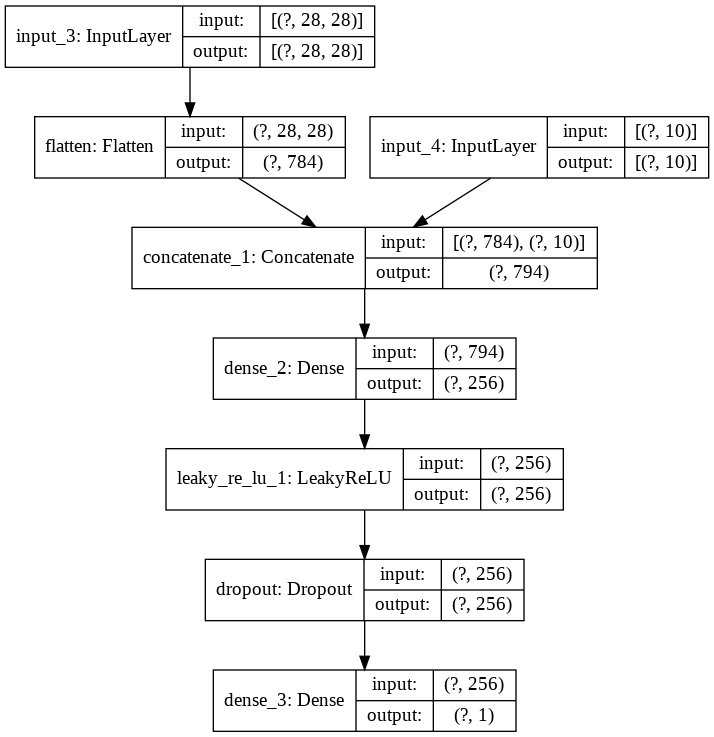

In [0]:
D.summary()
tf.keras.utils.plot_model(D, "discriminator.png", show_shapes=True)

위의 구조에서 알 수 있듯이, Discriminator의 입력으로는 (?, 794)의 텐서 구조가 들어오는 것을 확인할 수 있는데, 이는 28x28의 이차원 텐서 구조의 이미지를 Flatten 함수를 통해 1차원으로 만든 뒤, concatenate 함수를 통해 (?, 10)의 텐서 구조를 가진 condition과 결합하였기 때문이다.

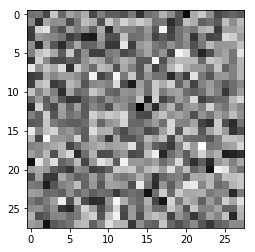

In [0]:
# Generator가 만들어 낸 노이즈 이미지 테스트 해보기
test_noise = tf.random.normal([1, 100])  ## 100개의 noise 생성
test_con = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]).astype("float32")
fake_image_test = G([test_noise, test_con], training=False) ## 해당 노이즈를 G를 통해 학습

plt.imshow(fake_image_test[0], cmap='gray')

In [0]:
# Discriminator에게 generator가 만든 노이즈 영상을 보여주고, 판단을 내릴 수 있는 테스트 함.
# 학습이 되지 않은 모델이기 때문에 자기 마음대로 판단함

decision = D([fake_image_test, test_con], training=False)
print(decision)

tf.Tensor([[-0.24074782]], shape=(1, 1), dtype=float32)


## GAN 목적함수
GAN의 목적함수는 다음과 같다.

$$
\begin{align}
    \min_{G}\max_{D} V(G, D) = \mathbb{E}_{\mathbf{x} \sim p_{\textit{data}}(\mathbf{x})}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))]
\end{align}
$$

### Discriminator Loss
판별자 D 입장에서는 GAN 목적함수를 다음과 같이 해석하고, 최대화 문제를 풀고자 한다.
$$
\begin{align}
    \max_{D} V(D) = \mathbb{E}_{\mathbf{x} \sim p_{\textit{data}}(\mathbf{x})}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(\mathbf{x}_{\textrm{fake}}))]
\end{align}
$$

### Generator Loss
생성자 G 입장에서는 GAN 목적함수를 다음과 같이 해석하고, 최소화 문제를 풀고자 한다.
$$
\begin{align}
    \min_{G} V(G) = \mathbb{E}_{\mathbf{z} \sim p_\mathbf{z}(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))]
\end{align}
$$

In [0]:
# GAN 트레이닝에 쓰일 cross-entropy fuctor 정의

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
# Discriminator loss 정의

def D_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [0]:
# Generator loss 정의

def G_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
# GAN 트레이닝에 쓰일 optimizer 정의

G_optimizer = tf.keras.optimizers.Adam(1e-4)
D_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
# 학습 루프 설정

EPOCHS = 50
noise_dim = 100

seed = tf.random.normal([BATCH_SIZE, noise_dim])

![GAN](https://cdn-images-1.medium.com/max/800/1*XKanAdkjQbg1eDDMF2-4ow.png)

[이미지 출처: Branko Blagojevic's Medium Post](https://medium.com/ml-everything/generating-letters-using-generative-adversarial-networks-gans-161b0be3c229)

In [0]:
# 배치단위 학습 함수 설정 (* AutoGraph 기능 쓰기!)

@tf.function  ## GPU 활성화 (학습이 빨라짐 (AutoGraph 기능))
def train_step(real_images):  
  
  noises = tf.random.normal([BATCH_SIZE, noise_dim])
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as dsc_tape:  ## gradient를 만들고 다음 gradient에 back propagation 시키겠다.
    fake_images = G([noises, real_images[1]], training=True)  ## 랜덤 노이즈 생성
    
    real_output = D([real_images[0], real_images[1]], training=True)
    fake_output = D([fake_images, real_images[1]], training=True)
    
    gen_loss = G_loss(fake_output)  ## 처음엔 minimize하도록 수식을 측정
    dsc_loss = D_loss(real_output, fake_output)
    
  gen_gradients = gen_tape.gradient(gen_loss, G.trainable_variables)  ## training 데이터에 대해 parameter update 시작
  dsc_gradients = dsc_tape.gradient(dsc_loss, D.trainable_variables)
  
  G_optimizer.apply_gradients(zip(gen_gradients, G.trainable_variables)) 
  D_optimizer.apply_gradients(zip(dsc_gradients, D.trainable_variables))
  

In [0]:
def test_step(real_images):  
  noises = tf.random.normal([BATCH_SIZE, noise_dim])
  
  fake_images = G([noises, real_images[1]], training=False)
  
  real_output = D([real_images[0], real_images[1]], training=False)
  fake_output = D([fake_images, real_images[1]], training=False)    
  
  gen_loss = G_loss(fake_output)
  dsc_loss = D_loss(real_output, fake_output)
  
  print("Generator loss:", gen_loss.numpy(), "Discriminator loss:", dsc_loss.numpy())
  return gen_loss.numpy(), dsc_loss.numpy()  ## loss를 기록하기 위해 값을 반환

In [0]:
# 학습 함수

def train(dataset, epochs):
  gen_loss_list = []
  dsc_loss_list = []
  for epoch in range(epochs):
    start = time.time()
    
    for i, image_batch in enumerate(dataset):
      train_step(image_batch)
      if i == 0:
        g_loss, d_loss = test_step(image_batch)  ## loss가 기록될 때마다 list에 저장
        gen_loss_list.append(g_loss)
        dsc_loss_list.append(d_loss)
        
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))   
  
  return gen_loss_list, dsc_loss_list

## Training

In [0]:
# 학습!!!  1에 가까워지고 있으면 잘 된것.
%%time
g_loss_list, d_loss_list = train(train_dataset, EPOCHS)

Generator loss: 1.950028 Discriminator loss: 0.38110518
Time for epoch 1 is 8.63745665550232 sec
Generator loss: 1.653655 Discriminator loss: 0.46460214
Time for epoch 2 is 8.655209302902222 sec
Generator loss: 1.8136212 Discriminator loss: 0.4029119
Time for epoch 3 is 8.533299922943115 sec
Generator loss: 1.7611835 Discriminator loss: 0.46854824
Time for epoch 4 is 8.643343925476074 sec
Generator loss: 2.2205355 Discriminator loss: 0.32930285
Time for epoch 5 is 8.574382305145264 sec
Generator loss: 1.892375 Discriminator loss: 0.453423
Time for epoch 6 is 8.493070602416992 sec
Generator loss: 2.092594 Discriminator loss: 0.4186589
Time for epoch 7 is 8.596975326538086 sec
Generator loss: 1.6970549 Discriminator loss: 0.55089116
Time for epoch 8 is 8.567507266998291 sec
Generator loss: 1.7737291 Discriminator loss: 0.5357928
Time for epoch 9 is 8.653201341629028 sec
Generator loss: 1.7678174 Discriminator loss: 0.59118736
Time for epoch 10 is 8.756581783294678 sec
Generator loss: 1.6

학습 과정에서 생성 네트웍(G)와 판별 네트웍(D)의 loss 값의 변화를 가시화하면 다음과 같다.

### Generator의 loss 값의 변화

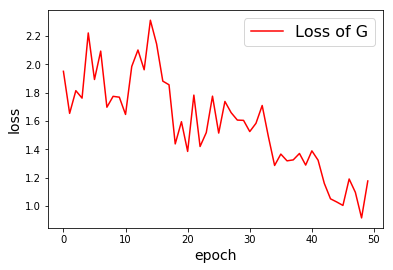

In [0]:
plt.plot(g_loss_list, 'r')
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.legend(["Loss of G"], fontsize=16)

전체적으로 G의 loss는 학습이 진행됨에 따라 감소 (1에 가까워짐) 하고 있는 것을 확인할 수 있다.



### Discriminator의 loss 값의 변화

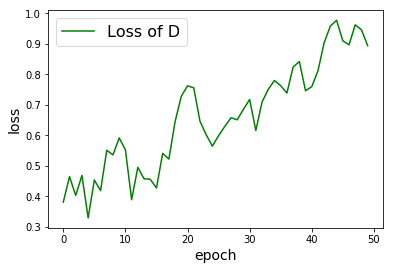

In [0]:
plt.plot(d_loss_list, 'g')
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.legend(["Loss of D"], fontsize=16)

전체적으로 D의 loss는 학습이 진행됨에 따라 증가 (1에 가까워짐) 하는 것을 확인할 수 있다.

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


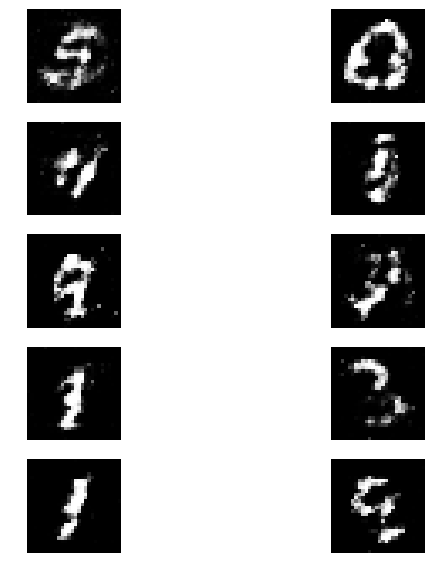

In [0]:
# Generator가 만들어 낸 노이즈 이미지 테스트 해보기

import matplotlib.pyplot as plt

noises = tf.random.normal([50, 100])  ## 50장의 노이즈 이미지 생성
generated_image = G([noises, train_label_onehots[:50]], training=False)
print(train_label_onehots[:10])
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))

for ax in axes.flat:
  ax.axis('off')

axes[0,0].imshow(generated_image[0], cmap='gray')
axes[0,1].imshow(generated_image[1], cmap='gray')
axes[1,0].imshow(generated_image[2], cmap='gray')
axes[1,1].imshow(generated_image[3], cmap='gray')
axes[2,0].imshow(generated_image[4], cmap='gray')
axes[2,1].imshow(generated_image[5], cmap='gray')
axes[3,0].imshow(generated_image[6], cmap='gray')
axes[3,1].imshow(generated_image[7], cmap='gray')
axes[4,0].imshow(generated_image[8], cmap='gray')
axes[4,1].imshow(generated_image[9], cmap='gray')

plt.show()

Generator가 만들어 낸 노이즈 이미지를 condition과 비교한 결과, 0, 1과 같이 비교적 단순한 모양의 숫자에 대해서는 잘 생성하였으나, 나머지 숫자에 대해서는 뚜렷한 이미지를 생성하지 못하는 것을 볼 수 있다. 보다 선명한 이미지를 생성하기 위해서는, epoch를 늘리는 방법이 가장 효과적이다. GAN은 layer를 깊게 쌓게 되면 학습이 매우 더디게 일어나 비효율적이기 때문이다.

## epoch를 50에서 500으로 증가시킨 후 결과 확인

In [0]:
# GAN 트레이닝에 쓰일 cross-entropy fuctor 정의

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
# Discriminator loss 정의

def D_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [0]:
# Generator loss 정의

def G_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
# GAN 트레이닝에 쓰일 optimizer 정의

G_optimizer = tf.keras.optimizers.Adam(1e-4)
D_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
# 학습 루프 설정

EPOCHS = 500
noise_dim = 100

seed = tf.random.normal([BATCH_SIZE, noise_dim])

In [0]:
# 배치단위 학습 함수 설정 (* AutoGraph 기능 쓰기!)

@tf.function  ## GPU 활성화 (학습이 빨라짐 (AutoGraph 기능))
def train_step(real_images):  
  
  noises = tf.random.normal([BATCH_SIZE, noise_dim])
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as dsc_tape:  ## gradient를 만들고 다음 gradient에 back propagation 시키겠다.
    fake_images = G([noises, real_images[1]], training=True)  ## 랜덤 노이즈 생성
    
    real_output = D([real_images[0], real_images[1]], training=True)
    fake_output = D([fake_images, real_images[1]], training=True)
    
    gen_loss = G_loss(fake_output)  ## 처음엔 minimize하도록 수식을 측정
    dsc_loss = D_loss(real_output, fake_output)
    
  gen_gradients = gen_tape.gradient(gen_loss, G.trainable_variables)  ## training 데이터에 대해 parameter update 시작
  dsc_gradients = dsc_tape.gradient(dsc_loss, D.trainable_variables)
  
  G_optimizer.apply_gradients(zip(gen_gradients, G.trainable_variables)) 
  D_optimizer.apply_gradients(zip(dsc_gradients, D.trainable_variables))

In [0]:
def test_step(real_images):  
  noises = tf.random.normal([BATCH_SIZE, noise_dim])
  
  fake_images = G([noises, real_images[1]], training=False)
  
  real_output = D([real_images[0], real_images[1]], training=False)
  fake_output = D([fake_images, real_images[1]], training=False)    
  
  gen_loss = G_loss(fake_output)
  dsc_loss = D_loss(real_output, fake_output)
  
  print("Generator loss:", gen_loss.numpy(), "Discriminator loss:", dsc_loss.numpy())
  return gen_loss.numpy(), dsc_loss.numpy()  ## loss를 기록하기 위해 값을 반환

In [0]:
# 학습 함수

def train(dataset, epochs):
  gen_loss_list = []
  dsc_loss_list = []
  for epoch in range(epochs):
    start = time.time()
    
    for i, image_batch in enumerate(dataset):
      train_step(image_batch)
      if i == 0:
        g_loss, d_loss = test_step(image_batch)  ## loss가 기록될 때마다 list에 저장
        gen_loss_list.append(g_loss)
        dsc_loss_list.append(d_loss)
        
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))   
  
  return gen_loss_list, dsc_loss_list

In [0]:
# 학습!!!  1에 가까워지고 있으면 잘 된것.
%%time
g_loss_list, d_loss_list = train(train_dataset, EPOCHS)

Generator loss: 1.5745245 Discriminator loss: 0.94455016
Time for epoch 1 is 11.12186050415039 sec
Generator loss: 1.0391062 Discriminator loss: 0.995347
Time for epoch 2 is 9.715943336486816 sec
Generator loss: 1.1384753 Discriminator loss: 0.89881444
Time for epoch 3 is 10.148603677749634 sec
Generator loss: 1.0808828 Discriminator loss: 0.9801645
Time for epoch 4 is 9.812824249267578 sec
Generator loss: 1.1078855 Discriminator loss: 1.0062022
Time for epoch 5 is 9.318565368652344 sec
Generator loss: 0.9604794 Discriminator loss: 0.98667014
Time for epoch 6 is 9.55454707145691 sec
Generator loss: 1.1027676 Discriminator loss: 0.91068184
Time for epoch 7 is 9.714395999908447 sec
Generator loss: 1.1818328 Discriminator loss: 0.9985503
Time for epoch 8 is 9.634655952453613 sec
Generator loss: 0.89276505 Discriminator loss: 1.0356293
Time for epoch 9 is 9.546148777008057 sec
Generator loss: 1.0014627 Discriminator loss: 0.97193015
Time for epoch 10 is 9.594082355499268 sec
Generator loss

### Generator의 loss 값의 변화

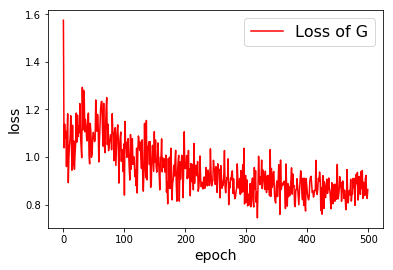

In [0]:
plt.plot(g_loss_list, 'r')
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.legend(["Loss of G"], fontsize=16)

위에서 학습시킨 바와 같이, 1에 가까워지는 것을 확인할 수 있다.

### Discriminator의 loss 값의 변화

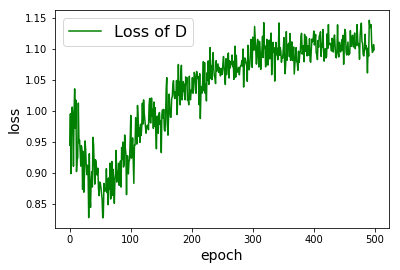

In [0]:
plt.plot(d_loss_list, 'g')
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.legend(["Loss of D"], fontsize=16)

역시 1에 가까워지는 것을 확인할 수 있다.

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


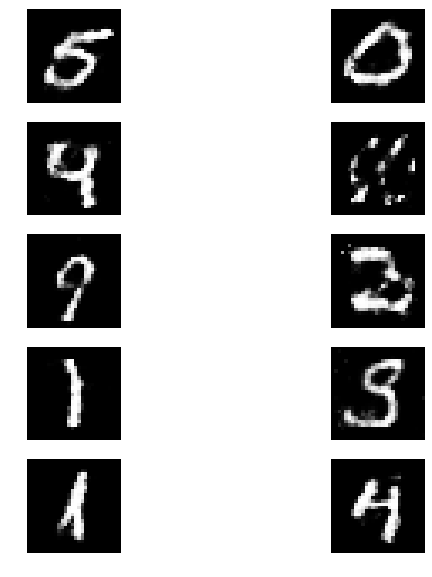

In [0]:
# Generator가 만들어 낸 노이즈 이미지 테스트 해보기

import matplotlib.pyplot as plt

noises = tf.random.normal([50, 100]) 
generated_image = G([noises, train_label_onehots[:50]], training=False)
print(train_label_onehots[:10])
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))

for ax in axes.flat:
  ax.axis('off')

axes[0,0].imshow(generated_image[0], cmap='gray')
axes[0,1].imshow(generated_image[1], cmap='gray')
axes[1,0].imshow(generated_image[2], cmap='gray')
axes[1,1].imshow(generated_image[3], cmap='gray')
axes[2,0].imshow(generated_image[4], cmap='gray')
axes[2,1].imshow(generated_image[5], cmap='gray')
axes[3,0].imshow(generated_image[6], cmap='gray')
axes[3,1].imshow(generated_image[7], cmap='gray')
axes[4,0].imshow(generated_image[8], cmap='gray')
axes[4,1].imshow(generated_image[9], cmap='gray')

plt.show()

500번 학습을 진행한 결과, 50번 학습했을 때보다 훨씬 선명하게 숫자가 출력된 것을 확인할 수 있다. 더 많이 학습시킬 수록 좋은 결과가 출력될 것이라고 예상할 수 있다.